Import libraries and dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('clean_data.csv')



view and handling missing values

In [21]:
df.head(10)
df.fillna(0,inplace=True)
df

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,0.0,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,0.0,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,0.0,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


find a unique value for categotical data

In [22]:
df['status'].unique().sum()

'Ready to moveUnder Construction'

In [24]:
df['builder'].unique()

array(['MP Developers', 'DAC Promoters',
       'Casagrand Builder Private Limited', 'Dugar Housing Builders',
       'Radiance Realty Developers India Ltd', 'Traventure Homes Pvt Ltd',
       'Urbanrise', 'Navin Housing Properties P LTD',
       'Jones foundation private limited', 'Isha Homes',
       'Kochar Homes Pvt Ltd', 'Pushkar Properties Pvt Ltd',
       'Asset Tree Homes', 'Urban Tree Infrastructures', 'Olympia Group',
       'Vijay Raja Homes Private Limited', 'Kamalam Builder Pvt Ltd',
       'Appaswamy Real Estate', 'VNR Homes', 'PS Srijan Developers',
       'Lifestyle Housing', 'Puravankara Limited', 'Jones Foundations',
       'Plaza Group', 'Urbando Housing LLP', 'EK Realtors',
       'The Nest Builder', 'Doshi Housing', 'Grandstyle constructions',
       'vinoth builders', 'GTK Foundations', 'Baashyaam Group', 'chris',
       'Krishna Constructions', 'AKS Housing Dedvelopment Pvt Ltd',
       'Mayances Construction and Engineering Services',
       'Ramaniyam Real Esta

data preprocessing and
categorical data

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetran = ohe.fit_transform(df[['status','location','builder']])

In [7]:
ohetran

,status_Ready to move,status_Under Construction,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,location_Alwarpet,location_Ambattur,location_Ambattur INDUSTRIAL ESTATE,location_Aminjikarai,...,builder_Vinay Asrani,builder_Vishal D,builder_Vishnu Foundation Ltd,builder_Yadhav constructions real estates,builder_chris,builder_mohammed,builder_seller,builder_smartassetsindia,builder_vinoth builders,builder_viswaraj
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2617,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df=pd.concat([df,ohetran],axis=1).drop(columns=['status','location','builder'])



split features and labels

In [9]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]


split the train and test set

In [10]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

import randomforest regresson model and train the model 

In [11]:
from sklearn.ensemble import RandomForestRegressor
ren = RandomForestRegressor()
ren.fit(X_train,Y_train)

RandomForestRegressor()

predict the new values

In [12]:
y_pred= ren.predict(X_test)
print(y_pred)

[  79.8524       31.25542857   80.8023      488.69         29.7781
   42.6046      219.29         50.7228       37.3876       82.7857
   67.09327425   36.1785       42.59483333   51.8331       44.7332
   46.5822       31.6625       41.9492       36.4398       46.8406
   39.3918       67.8978       46.1134       51.63285      30.42917978
   80.8023       54.0926       32.4318       36.423       149.8748
   27.8344       62.0343       21.0414      105.26         44.1807
   73.0665       27.5372       68.1212       80.9333       24.63144545
   95.1325       75.7471      103.3259       35.4973       38.27283333
   90.345        49.055        30.08694545  210.5125      111.1117
  249.2637       64.4575      398.           83.3734       78.4166
  400.55         51.14545      69.0567       55.953975     37.1859
  124.6247       55.40113333  311.59         63.7319       82.953
   44.1304      635.44        820.35         64.2297       69.36573333
   42.18         70.4885       48.3303       67

Evaluation

In [18]:
from sklearn import metrics
metrics.median_absolute_error(Y_test,y_pred)
mape=np.mean(np.abs((Y_test - y_pred)/np.abs(Y_test)))
print('accuracy:', round(100*(1 - mape),2))
mse= metrics.mean_squared_error(Y_test,y_pred)
print('mean sequare error:',mse)
r2= metrics.r2_score(Y_test,y_pred)
print('R-squared:',r2)

accuracy: 89.41
mean sequare error: 950.2713259781716
R-squared: 0.9438388031108906


visualizing a decision tree

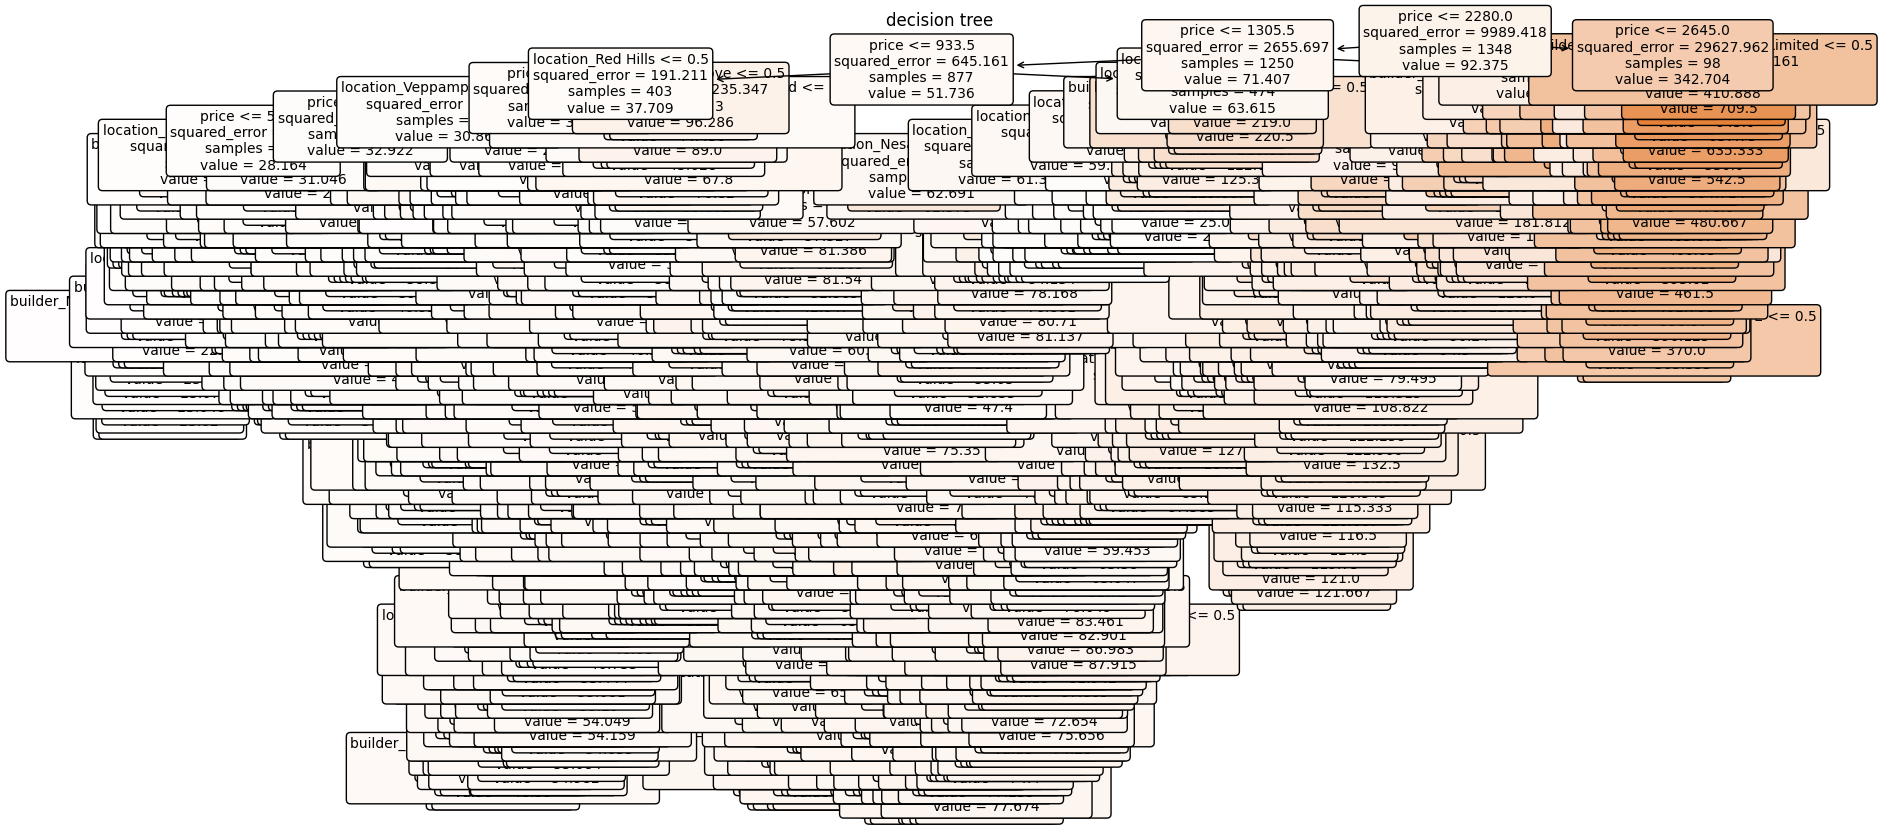

In [15]:
from sklearn.tree import plot_tree
tree_to_plot=ren.estimators_[0]
#plot decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_to_plot,feature_names=df.columns.tolist(),filled=True,rounded=True,fontsize=10)
plt.title('decision tree')
plt.show()
